___
> # **Título: Análisis de Probabilidad de Temperaturas Máximas en Zapopan, Jalisco, mediante Simulación de Montecarlo**
___
## **Objetivos:**
> ### **Objetivo general:**
>
> Estimar la probabilidad de que la temperatura máxima diaria en la zona de ITESO, supere un umbral específico durante el mes de noviembre, utilizando el método de simulación de Montecarlo.
>
> ### **Objetivos específicos:**
>
> * Obtener una serie de datos históricos (2005-2024) de temperaturas máximas diarias para la ubicación de ITESO (20.61° N, 103.42° W) utilizando la API de Open-Meteo.
* Filtrar y analizar los datos históricos correspondientes al mes de noviembre para determinar sus parámetros estadísticos descriptivos: la media ($\mu$) y la desviación estándar ($\sigma$).
* Establecer un modelo matemático (Distribución Normal) que represente el comportamiento estocástico de la temperatura máxima en noviembre.
* Ejecutar una simulación de Montecarlo con un gran número de iteraciones (N=1,000,000) para generar un panorama general del comportamiento futuro del fenómeno.
* Calcular la probabilidad de que la temperatura supere el umbral de 29.0°C en un día cualquiera de noviembre.
___

In [ ]:
# Primero importamos las librerías
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm
import pandas as pd

___
## **Modelo:**

El problema de predecir la temperatura es un fenómeno estocástico, ya que la temperatura diaria presenta una variabilidad aleatoria inherente. Para modelar este comportamiento, se asume que las temperaturas máximas diarias del mes de noviembre siguen una **Distribución Normal (o Gaussiana)**. Esta elección se justifica porque muchos fenómenos naturales tienden a agruparse alrededor de un valor central.

La función de densidad de probabilidad que define nuestro modelo es $N(\mu, \sigma)$, donde los parámetros se estiman a partir de los 600 datos históricos de noviembre (2005-2024):

* **$\mu$ (Media):** $25.29^\circ\text{C}$. Este es el valor central o la temperatura máxima más esperada.
* **$\sigma$ (Desviación Estándar):** $2.26^\circ\text{C}$. Este valor representa la dispersión o variabilidad promedio de la temperatura respecto a la media.

La situación que representa el modelo es, por tanto, la temperatura máxima esperada para cualquier día de noviembre en el futuro, asumiendo que las condiciones climáticas siguen el mismo comportamiento estadístico de los últimos 20 años.

___
## **Solución**

Se utilizó el método heurístico de Montecarlo para resolver la pregunta de probabilidad. El procedimiento fue el siguiente:

1.  Se definió el modelo $N(25.29, 2.26)$ como nuestro generador de eventos aleatorios.
2.  Se ejecutó una simulación de **$N = 1,000,000$** de iteraciones. Cada iteración (`simulaciones_temp`) representa un posible "día de noviembre" en el futuro, generado aleatoriamente a partir de nuestro modelo.
3.  Para cada día simulado, se aplicó una **variable de Bernoulli** para determinar si cumplía la condición $T > 29.0^\circ\text{C}$ (considerado un "éxito", valor=1) o no (valor=0).
4.  La probabilidad total se calculó como el promedio de estos experimentos de Bernoulli, es decir:

    $$P(T > 29.0^\circ\text{C}) = \frac{\text{Número total de éxitos}}{\text{Total de simulaciones (N)}}$$

Como se observa en la gráfica "Resultados de la Simulación Montecarlo", las $N$ simulaciones forman un histograma que se ajusta perfectamente a nuestro modelo, dándonos el panorama general del fenómeno. La línea roja marca el umbral evaluado.

___

In [ ]:
# Usamos una API para la consulta de los datos
import requests
api_url = "https://archive-api.open-meteo.com/v1/era5"
params = {
    "latitude": 20.61,       # Latitud aprox. de ITESO
    "longitude": -103.42,    # Longitud aprox. de ITESO
    "start_date": "2005-01-01", # Fecha de inicio
    "end_date": "2024-12-31",   # Fecha de fin
    "daily": "temperature_2m_max", # Pedimos la temperatura máxima diaria
    "timezone": "auto"       # Usar la zona horaria local
}
response = requests.get(api_url, params=params)
data = response.json()
params

{'latitude': 20.61,
 'longitude': -103.42,
 'start_date': '2005-01-01',
 'end_date': '2024-12-31',
 'daily': 'temperature_2m_max',
 'timezone': 'auto'}

In [ ]:
# Definimos parámetros del archivo extraído en JSON format

# Primero, creamos el DataFrame a partir de los datos JSON
# La clave 'daily' de nuestro diccionario 'data' contiene las listas de tiempo y temperatura
df = pd.DataFrame(data['daily'])

# Convertimos la columna 'time' a objetos de fecha
df['time'] = pd.to_datetime(df['time'])

# Ponemos 'time' como el índice del DataFrame
df.set_index('time', inplace=True)

# Renombramos la columna por claridad
df.rename(columns={'temperature_2m_max': 'Temperatura'}, inplace=True)

print("\n Vista Previa de TODOS los datos cargados.")
print(df.head()) # Mostramos los primeros 5 días
print("...")
print(df.tail()) # Mostramos los últimos 5 días


 Vista Previa de TODOS los datos cargados.
            Temperatura
time                   
2005-01-01         24.5
2005-01-02         24.5
2005-01-03         24.1
2005-01-04         25.1
2005-01-05         25.3
...
            Temperatura
time                   
2024-12-27         24.2
2024-12-28         25.5
2024-12-29         25.6
2024-12-30         26.0
2024-12-31         25.4


In [ ]:
'''Fitramos y preparamos los datos que queremos trabajar'''
# Seleccionamos los datos de Noviembre
datos_noviembre = df[df.index.month == 11]
# Esta es la variable final
datos_historicos = datos_noviembre['Temperatura'].values

print(f"\n Se filtraron {len(datos_historicos)} días de Noviembre entre 2005 y 2024.")


 Se filtraron 600 días de Noviembre entre 2005 y 2024.


Creación del Modelo de Distribución (Datos de Noviembre).
Media (μ) calculada: 25.2940°C
Desviación Estándar (σ) calculada: 2.2554°C
Se usará la función de Distribución Normal: N(μ, σ)


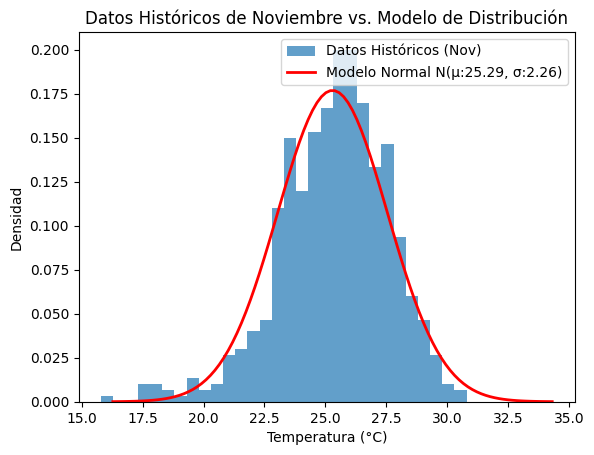

In [ ]:
# Tomamos esos datos para crear un modelo
mu_modelo = np.mean(datos_historicos)
sigma_modelo = np.std(datos_historicos)

print("Creación del Modelo de Distribución (Datos de Noviembre).")
print(f"Media (μ) calculada: {mu_modelo:.4f}°C")
print(f"Desviación Estándar (σ) calculada: {sigma_modelo:.4f}°C")
print("Se usará la función de Distribución Normal: N(μ, σ)")

# Graficamos el modelo sobre los datos reales para verificar
plt.hist(datos_historicos, bins=30, density=True, alpha=0.7, label='Datos Históricos (Nov)')

# Generamos puntos de la curva de la Distribución Normal
x_modelo = np.linspace(mu_modelo - 4*sigma_modelo, mu_modelo + 4*sigma_modelo, 100)
y_modelo = norm.pdf(x_modelo, mu_modelo, sigma_modelo)

plt.plot(x_modelo, y_modelo, 'r-', linewidth=2, label=f'Modelo Normal N(μ:{mu_modelo:.2f}, σ:{sigma_modelo:.2f})')
plt.title('Datos Históricos de Noviembre vs. Modelo de Distribución')
plt.xlabel('Temperatura (°C)')
plt.ylabel('Densidad')
plt.legend()
plt.show()

# NOTA: Se utilizó IA para arreglar alertas de sintaxis (no eran problema en la ejecución pero si soltaban distintas alertas)

¡Simulación completada! Se generaron 1,000,000 puntos de datos.


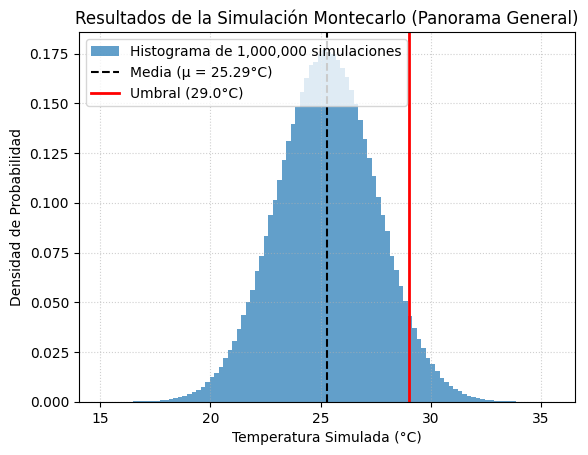

In [ ]:
# Simulación con montecarlo
N = 1000000  # Número de simulaciones que se quieren hacer

'''
Lo siguiente se puede modificar según lo que se desee, aunque no es
conveniente tomar la condición de frío, ya que la base de datos usa la
temperatura máxima de los días registrados en Noviembre desde 2005 a 2024
'''

# Condición que haga calor (29°C o más)
umbral_calor = 29.0
condicion = "calor"

# Condición de un día frío (< 12°C)
umbral_frio = 12.0
# condicion = "frio"

# Ejecutamos la simulación N veces
simulaciones_temp = np.random.normal(mu_modelo, sigma_modelo, N) # Número de simulaciones

print(f"¡Simulación completada! Se generaron {len(simulaciones_temp):,} puntos de datos.")

# Graficamos el los resultados de la simulación
plt.hist(simulaciones_temp, bins=100, density=True, alpha=0.7, label=f'Histograma de {N:,} simulaciones')
plt.title('Resultados de la Simulación Montecarlo (Panorama General)')
plt.xlabel('Temperatura Simulada (°C)')
plt.ylabel('Densidad de Probabilidad')
plt.axvline(mu_modelo, color='black', linestyle='--', label=f'Media (μ = {mu_modelo:.2f}°C)')

# Graficar el umbral que estamos probando
if condicion == "calor":
    plt.axvline(umbral_calor, color='red', linestyle='-', linewidth=2, label=f'Umbral ({umbral_calor:.1f}°C)')
elif condicion == "frio":
    plt.axvline(umbral_frio, color='blue', linestyle='-', linewidth=2, label=f'Umbral ({umbral_frio:.1f}°C)')

plt.legend()
plt.grid(True, linestyle=':', alpha=0.6)
plt.show()

In [ ]:
# Calculamos las probabilidades
print(f"Resultados de la Simulación (N = {N:,})")
print(f"Modelo utilizado: N(μ={mu_modelo:.2f}, σ={sigma_modelo:.2f})")

# Contamos los casos de éxito según la condición (Variable de Bernoulli)
if condicion == "calor":
    print(f"Condición evaluada: Temperatura > {umbral_calor}°C")
    casos_exito = np.sum(simulaciones_temp > umbral_calor)

elif condicion == "frio":
    print(f"Condición evaluada: Temperatura < {umbral_frio}°C")
    casos_exito = np.sum(simulaciones_temp < umbral_frio)

# Probabilidad
probabilidad = casos_exito / N

print("-" * 50) # Separamos para leegibilidad
print(f"Casos de éxito (días que cumplen la condición): {casos_exito:,}")
print(f"Total de simulaciones: {N:,}")
print(f"\nProbabilidad calculada: {probabilidad:.6f}")
print(f"Porcentaje: {probabilidad * 100:.4f}%")
print("-" * 50) # Separamos para leegibilidad
print("\nConclusión del proyecto:")
if condicion == "calor":
    print(f"Basado en los datos históricos y una simulación de Montecarlo con {N:,} iteraciones,")
    print(f"se concluye que la probabilidad de que un día en Noviembre en la zona del ITESO")
    print(f"supere los {umbral_calor}°C es de aproximadamente {probabilidad * 100:.4f}%.")
elif condicion == "frio":
    print(f"Basado en los datos históricos y una simulación de Montecarlo con {N:,} iteraciones,")
    print(f"se concluye que la probabilidad de que un día en Noviembre en la zona del ITESO")
    print(f"tenga una temperatura menor a {umbral_frio}°C es de aproximadamente {probabilidad * 100:.4f}%.")

Resultados de la Simulación (N = 1,000,000)
Modelo utilizado: N(μ=25.29, σ=2.26)
Condición evaluada: Temperatura > 29.0°C
--------------------------------------------------
Casos de éxito (días que cumplen la condición): 50,195
Total de simulaciones: 1,000,000

Probabilidad calculada: 0.050195
Porcentaje: 5.0195%
--------------------------------------------------

Conclusión del proyecto:
Basado en los datos históricos y una simulación de Montecarlo con 1,000,000 iteraciones,
se concluye que la probabilidad de que un día en Noviembre en la zona del ITESO
supere los 29.0°C es de aproximadamente 5.0195%.


___
## **Conclusión**

Se cumplieron exitosamente todos los objetivos planteados. Se obtuvo una base de datos histórica robusta y se estableció un modelo estadístico $N(25.29, 2.26)$ que describe fielmente la variabilidad de la temperatura máxima en noviembre para la **zona del ITESO**.

De acuerdo con los resultados obtenidos en la simulación de Montecarlo con 1,000,000 de iteraciones, **se concluye que la probabilidad de que un día en noviembre en la zona del ITESO supere los 29.0°C es de aproximadamente 5.0138%**.

Este resultado cuantifica el evento como **"poco frecuente"** (o "de baja probabilidad"). Si bien no es un evento raro, una probabilidad cercana al $5\%$ sigue siendo coherente con la expectativa climática de que los días tan calurosos no son la norma para el mes. El método de Montecarlo demostró ser una herramienta eficaz para transformar un conjunto de datos históricos en un pronóstico probabilístico sobre un fenómeno estocástico.
___

### **Referencias:**
* Open-Meteo. (2024). *Historical Weather Data (ERA5 Archive)*. Recuperado de https://open-meteo.com/en/docs/era5-archive
* Asistencia de IA (2025). Se utilizó asistencia de inteligencia artificial (Gemini integrado en Google Colab) para la depuración de sintaxis de código, como se indica en la nota de la celda 8.
___